In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df = train_df.drop('PassengerId',axis = 1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = test_df.drop('PassengerId', axis = 1)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
features = train_df.iloc[:,1:] #dataframe
output = train_df.iloc[:,0] #series

In [6]:
# import the modules we need
from sklearn.preprocessing import Imputer
# make a new imputer 
#fills empty cells with mean of column,axis = 0 column
imputer = Imputer(missing_values='NaN', strategy='mean',axis=0)
#must be a 2D array for SKlearn to work, hence, list of lists [['']]
features[['Pclass','Age','SibSp','Fare']] = imputer.fit_transform(features[['Pclass','Age','SibSp','Fare']])
test_df[['Pclass','Age','SibSp','Fare']] = imputer.transform(test_df[['Pclass','Age','SibSp','Fare']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
# output= output.values
# output.reshape(-1,1)
## reshapes the array into 2D to be accepted with sklearn
##use (1,-1) for single sample, (-1,1) for single feature

In [8]:
# import the needed librarys
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
features['Name'] = encoder.fit_transform(features['Name'])
#encoder works with one column only, so we will have to do it for each column alone
features['Sex'] = encoder.fit_transform(features['Sex'])
features['Ticket'] = encoder.fit_transform(features['Ticket'])
features['Cabin'].replace(np.nan, 'NaN', inplace=True)
features['Cabin'] = encoder.fit_transform(features['Cabin'])
features['Embarked'].replace(np.nan, 'NaN', inplace=True)
features['Embarked'] = encoder.fit_transform(features['Embarked'])

In [9]:
# same goes for test_df data
test_df['Name'] = encoder.fit_transform(test_df['Name'])
#encoder works with one column only, so we will have to do it for each column alone
test_df['Sex'] = encoder.fit_transform(test_df['Sex'])
test_df['Ticket'] = encoder.fit_transform(test_df['Ticket'])
test_df['Cabin'].replace(np.nan, 'NaN', inplace=True)
test_df['Cabin'] = encoder.fit_transform(test_df['Cabin'])
test_df['Embarked'].replace(np.nan, 'NaN', inplace=True)
test_df['Embarked'] = encoder.fit_transform(test_df['Embarked'])

In [21]:
plot_df = features.assign(Survived = output)

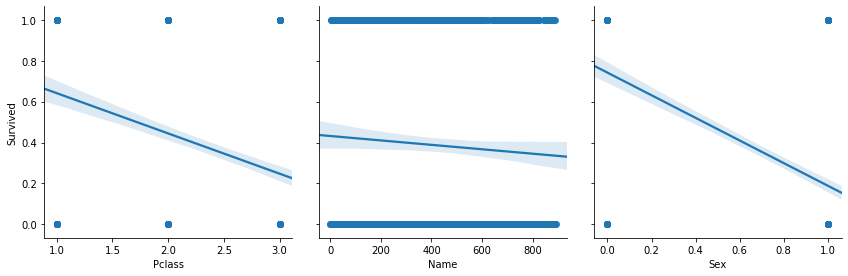

In [40]:
sns.pairplot(plot_df, x_vars=['Pclass','Name','Sex'], y_vars=['Survived'], height=4, kind='reg')

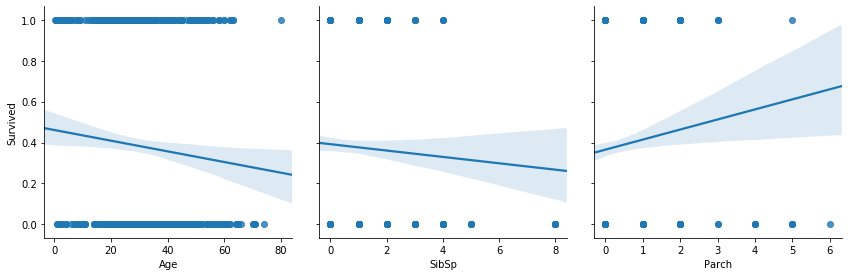

In [41]:
sns.pairplot(plot_df, x_vars=['Age','SibSp','Parch'], y_vars=['Survived'], height=4, kind='reg')

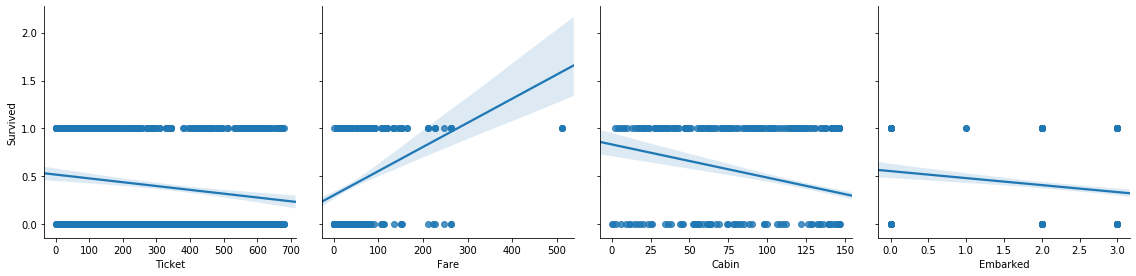

In [42]:
sns.pairplot(plot_df, x_vars=['Ticket','Fare','Cabin','Embarked'], y_vars=['Survived'], height=4, kind='reg')

### From the figures above, we can deduce higher survival rates for passengers who have the following attributes:

    -Lower Pclass value (upper-calss passengers i.e. 1st class and 2nd class passengers)
    -Are females
    -Of age less than 20
    -With relatives of the first degree or have no relatives at all
    -Have high number of parents/children
    -Have tickets encoded between 0 and 50
    -Paid higher fares
    -Have cabins with smaller numbers (i.e. those of the upper levels A,B,C..etc,), which matches lower PClass
    -Have embarked from Cherbourg (Ports are: C = Cherbourg; Q = Queenstown; S = Southampton)
    
### While the name almost has no effect on the chance of survival.

In [46]:
#we will drop the names col as it has almost no effect on the survival rates
features.drop('Name', axis = 1)
test_df.drop('Name', axis = 1)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3.0,1,34.500000,0.0,0,152,7.8292,76,1
1,3.0,0,47.000000,1.0,0,221,7.0000,76,2
2,2.0,1,62.000000,0.0,0,73,9.6875,76,1
3,3.0,1,27.000000,0.0,0,147,8.6625,76,2
4,3.0,0,22.000000,1.0,1,138,12.2875,76,2
...,...,...,...,...,...,...,...,...,...
413,3.0,1,29.699118,0.0,0,267,8.0500,76,2
414,1.0,0,39.000000,0.0,0,324,108.9000,22,0
415,3.0,1,38.500000,0.0,0,346,7.2500,76,2
416,3.0,1,29.699118,0.0,0,220,8.0500,76,2


In [47]:
# import the modules 
#in this part we split the training data with known output into train and test sets in order to obtain a model (to keep fromover fitting)
#the test_df has no known output and will be used for testing only
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, output, test_size = 0.2, random_state = 0)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #better than min_max scaler as it can handle outliers better
# take a look how the values was before and after the scalling 
x_train = scaler.fit_transform(x_train)#fit and transform in train, then take the value obtained in fit and apply it to test
x_test = scaler.transform(x_test)# transform only, apply to test

## This data is now ready to be trained